In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline

# 1. Single Variable

## Data 

Text(0, 0.5, 'y')

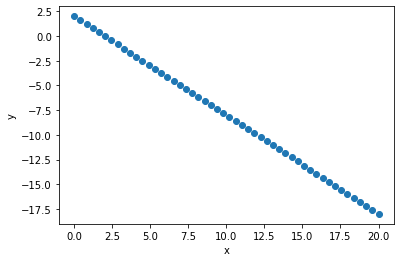

In [2]:
X=np.linspace(0,20)
Y=-X+2
#plot
plt.plot(X,Y,"o")
plt.xlabel("x")
plt.ylabel("y")

## Batch

In [3]:
def Adam_Batch_GD(x,y,beta1=0.1, beta2=0.1,alpha=0.001,epsilon=0.001, iterations_no=100):
    losses=[]
    ths_0=[]
    ths_1=[]
    Y_predict_list=[]
   
    #1. intialize parameters
    theta_0=0
    theta_1=0
    v_0=0
    v_1=0
    m_0=0
    m_1=0
    
    for e in range(iterations_no):
        print('======================================================================')
        print('epoch ', e)
        
        ths_0.append(theta_0)
        ths_1.append(theta_1)
        #2. get predicted output

        y_hat=theta_0+theta_1*x
        Y_predict_list.append(y_hat)

        #3. cost function
        error=(y_hat-y)
        
        J=(np.dot(error,error))/(2*len(x))
        
        losses.append(J)  
        print('cost= ', J)
        #4. gradient

        th0_gd =((y_hat - y).sum())/(len(x))
        th1_gd = (np.dot((y_hat - y),x))/(len(x))

        #5. Update the parameters (simultaneously).
        
        
        m_0= beta1 * m_0 + (1-beta1)*(th0_gd)
        m_1 = beta1 * m_1 + (1- beta1)*(th1_gd)
        
        v_0 =  beta2 * v_0 + (1- beta2) *((th0_gd)**2)
        v_1 =  beta2 * v_1 + (1- beta2) *((th1_gd)**2)
        
        theta_0 = theta_0 - ((alpha)/(np.sqrt(v_0) +epsilon )) * m_0
        theta_1 = theta_1 - ((alpha)/(np.sqrt(v_1) +epsilon )) * m_1
        
        print('theta 0 = ', theta_0)
        print('theta 1 = ' , theta_1)
        
        # stop condition
        if (e !=0):
            if (abs(losses[e-1] - losses[e])<0.001):
                break
            
    
    
    return y_hat,theta_0 , theta_1, ths_0, ths_1, losses, Y_predict_list

In [4]:
y_hat,theta_0 , theta_1, ths_0, ths_1, losses, Y_predict_list=Adam_Batch_GD(X,Y,beta1=0.6,beta2=0.6,alpha=0.1,epsilon=0.00001, iterations_no=100)


epoch  0
cost=  49.34693877551021
theta 0 =  -0.06324542820361466
theta 1 =  -0.06324554448450757
epoch  1
cost=  41.89848620347874
theta 0 =  -0.1431661314970324
theta 1 =  -0.14317950478827118
epoch  2
cost=  33.3756671653334
theta 0 =  -0.23136643924693212
theta 1 =  -0.2314407796007243
epoch  3
cost=  25.12083595807453
theta 0 =  -0.32374522468785033
theta 1 =  -0.3239962179956417
epoch  4
cost=  17.76756938950949
theta 0 =  -0.41779417158080123
theta 1 =  -0.4184684414263524
epoch  5
cost=  11.637945483385053
theta 0 =  -0.5115378890311063
theta 1 =  -0.5131490948391066
epoch  6
cost=  6.889293944439982
theta 0 =  -0.6027368606605513
theta 1 =  -0.6063892419005739
epoch  7
cost=  3.5764900564290527
theta 0 =  -0.6877187803089118
theta 1 =  -0.6959271897067282
epoch  8
cost=  1.6662105024745757
theta 0 =  -0.7590285721188514
theta 1 =  -0.7777403891424217
epoch  9
cost=  1.000807127150582
theta 0 =  -0.8022878752352426
theta 1 =  -0.8440984332784686
epoch  10
cost=  1.1944854167254

theta 1 =  -0.9872029030767255
epoch  61
cost=  0.012846056379949004
theta 0 =  1.9990916973234418
theta 1 =  -1.001709431088333
epoch  62
cost=  0.0002127374852258901
theta 0 =  1.9937116373775208
theta 1 =  -1.007112019382229
epoch  63
cost=  0.003873464687864531
theta 0 =  2.0183828206138594
theta 1 =  -0.9823915072804225
epoch  64
cost=  0.02428742723391464
theta 0 =  1.9770681191328405
theta 1 =  -1.0236549718444914
epoch  65
cost=  0.04337196323198228
theta 0 =  2.0103493635181797
theta 1 =  -0.9903133944628614
epoch  66
cost=  0.007375241958675581
theta 0 =  2.0086970075225326
theta 1 =  -0.9918800841332811
epoch  67
cost=  0.005184396646380593
theta 0 =  1.9824067232969131
theta 1 =  -1.0180788918796824
epoch  68
cost=  0.025347531048899884
theta 0 =  2.0163067124300045
theta 1 =  -0.9841056362423989
epoch  69
cost=  0.01973871359616863
theta 0 =  1.9951847287478943
theta 1 =  -1.0051614246126819
epoch  70
cost=  0.0020542729388201733
theta 0 =  1.9958775504672654
theta 1 =  -1

In [5]:
r2_score(Y, y_hat)

0.9999141756396621

Text(0, 0.5, 'loss')

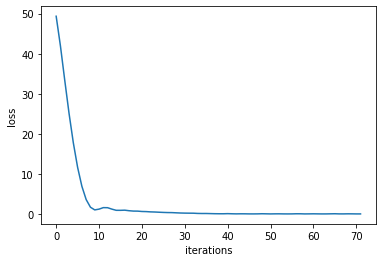

In [6]:
plt.plot(losses)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

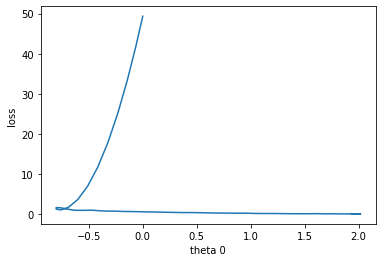

In [7]:
plt.plot(ths_0,losses)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

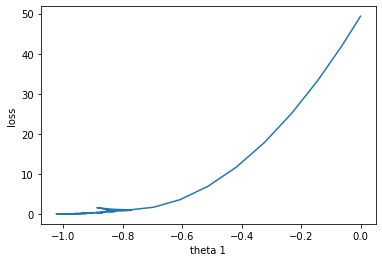

In [8]:
plt.plot(ths_1,losses)
plt.xlabel("theta 1")
plt.ylabel("loss")

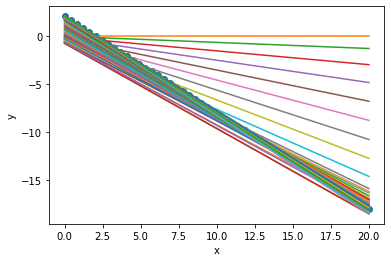

In [9]:
plt.plot(X,Y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(Y_predict_list)):
    plt.plot(X,Y_predict_list[i])
    
    
plt.show()

Text(0, 0.5, 'y')

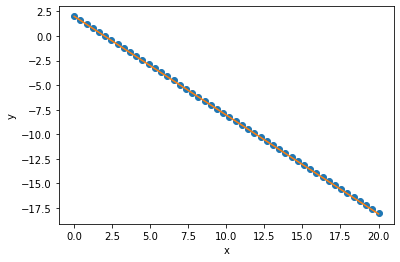

In [10]:
#fitted line
plt.plot(X,Y,"o")
plt.plot(X, y_hat)
plt.xlabel("x")
plt.ylabel("y")

## Batch with Bias correction

In [11]:
def Adam_BC_Batch_GD(x,y,beta1=0.1, beta2=0.1,alpha=0.001,epsilon=0.001, iterations_no=100):
    losses=[]
    ths_0=[]
    ths_1=[]
    Y_predict_list=[]
   
    #1. intialize parameters
    theta_0=0
    theta_1=0
    v_0=0
    v_1=0
    m_0=0
    m_1=0
    
    for e in range(iterations_no):
        print('======================================================================')
        print('epoch ', e)
        
        ths_0.append(theta_0)
        ths_1.append(theta_1)
        #2. get predicted output

        y_hat=theta_0+theta_1*x
        Y_predict_list.append(y_hat)

        #3. cost function
        error=(y_hat-y)
        
        J=(np.dot(error,error))/(2*len(x))
        
        losses.append(J)  
        print('cost= ', J)
        #4. gradient

        th0_gd =((y_hat - y).sum())/(len(x))
        th1_gd = (np.dot((y_hat - y),x))/(len(x))

        #5. Update the parameters (simultaneously).
        
        
        m_0= beta1 * m_0 + (1-beta1)*(th0_gd)
        m_1 = beta1 * m_1 + (1- beta1)*(th1_gd)
        
        #bias correction 
        m_0_hat= m_0 /( 1- ((beta1)**(e+1))) # power e+1 to avoid getting 0 power that will lead to divide by zero error
        m_1_hat= m_1/ ( 1- ((beta1)**(e+1)))
        
        v_0 =  beta2 * v_0 + (1- beta2) *((th0_gd)**2)
        v_1 =  beta2 * v_1 + (1- beta2) *((th1_gd)**2)
        
        #bias correction
        v_0_hat=  v_0 /( 1- ((beta2)**(e+1)))
        v_1_hat=  v_0 /( 1- ((beta2)**(e+1)))
        
        #update with bias correction
        
        theta_0 = theta_0 - ((alpha)/(np.sqrt(v_0_hat) +epsilon )) * m_0_hat
        theta_1 = theta_1 - ((alpha)/(np.sqrt(v_1_hat) +epsilon )) * m_1_hat
        
        print('theta 0 = ', theta_0)
        print('theta 1 = ' , theta_1)
        
        # stop condition
        if (e !=0):
            if (abs(losses[e-1] - losses[e])<0.001):
                break
            
    
    
    return y_hat,theta_0 , theta_1, ths_0, ths_1, losses, Y_predict_list

In [12]:
y_hat_BC,theta_0_BC , theta_1_BC, ths_0_BC, ths_1_BC, losses_BC, Y_predict_list_BC=Adam_BC_Batch_GD(X,Y,beta1=0.9,beta2=0.999,alpha=0.1,epsilon=10**(-8), iterations_no=100)


epoch  0
cost=  49.34693877551021
theta 0 =  -0.099999999875
theta 1 =  -1.4336734675956633
epoch  1
cost=  23.978261848056874
theta 0 =  -0.1055331809158721
theta 1 =  -1.606290235593015
epoch  2
cost=  39.73819348448039
theta 0 =  -0.06908996486216555
theta 1 =  -1.2103237017128983
epoch  3
cost=  9.471516438180451
theta 0 =  -0.023017765955579618
theta 1 =  -0.6941608254168697
epoch  4
cost=  2.1585906718209675
theta 0 =  0.011717541053323788
theta 1 =  -0.34205923165377766
epoch  5
cost=  18.04846330041218
theta 0 =  0.02361750741978748
theta 1 =  -0.3012259284569784
epoch  6
cost=  21.027109141346646
theta 0 =  0.016918776123158858
theta 1 =  -0.5126692530921779
epoch  7
cost=  8.29645016707187
theta 0 =  0.0019428194214859088
theta 1 =  -0.8412349822916123
epoch  8
cost=  0.5214696322332738
theta 0 =  -0.010062987224404994
theta 1 =  -1.1372077850883453
epoch  9
cost=  6.0460113824703425
theta 0 =  -0.010277555871217566
theta 1 =  -1.2783564498459308
epoch  10
cost=  12.834541763

In [13]:
r2_score(Y,y_hat_BC)

0.9907161316055307

Text(0, 0.5, 'loss')

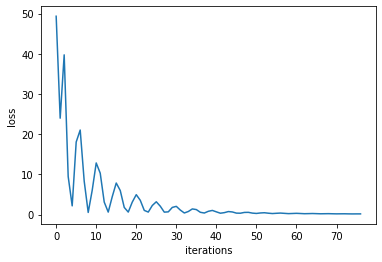

In [14]:
plt.plot(losses_BC)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

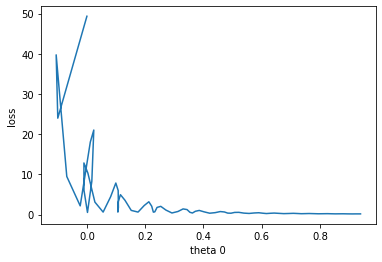

In [15]:
plt.plot(ths_0_BC,losses_BC)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

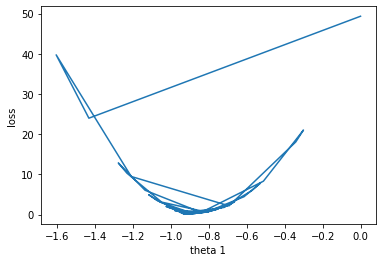

In [16]:
plt.plot(ths_1_BC,losses_BC)
plt.xlabel("theta 1")
plt.ylabel("loss")

Text(0, 0.5, 'y')

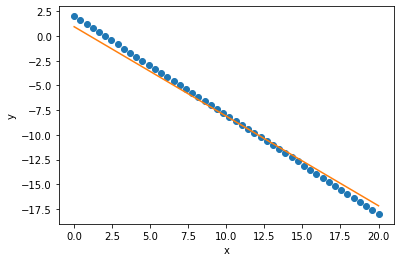

In [17]:
#fitted line
plt.plot(X,Y,"o")
plt.plot(X, y_hat_BC)
plt.xlabel("x")
plt.ylabel("y")

## Mini Batch with Bias correction

In [18]:
def mini_batches(x,y,batch_size):
    x_batches=[]
    y_batches=[]
    number_of_batches=len(x)//batch_size
    
    for i in range(number_of_batches):
        x_batches.append(x[i*batch_size: (i+1)*batch_size])
        y_batches.append(y[i*batch_size : (i+1)*batch_size])
    return x_batches, y_batches
        
    

In [19]:
def Adam_MiniBatch_GD(x,y, batch_size=1,beta1=0.01, beta2=0.01,alpha=0.001,epsilon=0.001, Epochs_no=100):
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
    
    x_batchs=[]
    y_batchs=[]
    
    #get the batches 
    x_batchs,y_batchs=mini_batches(x,y,batch_size)
    
    #1. assume intial values for parameters 
    theta_0=0
    theta_1=0
    v_0=0
    v_1=0
    m_0=0
    m_1=0
    
    
    for e in range(Epochs_no): #epochs loop
        print('==============================================')
        print('epoch ',e)
        
        Y_pred_per_epoch=[]
        for i in range(len(x_batchs)):#loop through all batches
            #2.predict 
            y_predicted= theta_0 + theta_1 * x_batchs[i]
            Y_pred_per_epoch.extend(y_predicted)
            #3.cost 
            error= y_predicted - y_batchs[i]
            J= (np.dot(error, error))/(2*batch_size)
            loss.append(J)
            
            #4.gradient
            grad_th0=( y_predicted - y_batchs[i]).sum()/(batch_size)
            grad_th1= (np.dot((y_predicted - y_batchs[i]), x_batchs[i]))/(batch_size)
            
            #update
            
            m_0= beta1 * m_0 + (1-beta1)*(grad_th0)
            m_1 = beta1 * m_1 + (1- beta1)*(grad_th1)

            #bias correction 
            m_0_hat= m_0 /( 1- ((beta1)**(e+1))) # power e+1 to avoid getting 0 power that will lead to divide by zero error
            m_1_hat= m_1/ ( 1- ((beta1)**(e+1)))
        
            v_0 =  beta2 * v_0 + (1- beta2) *((grad_th0)**2)
            v_1 =  beta2 * v_1 + (1- beta2) *((grad_th1)**2)

            #bias correction
            v_0_hat=  v_0 /( 1- ((beta2)**(e+1)))
            v_1_hat=  v_0 /( 1- ((beta2)**(e+1)))
            
            
            theta_0 = theta_0 - ((alpha)/(np.sqrt(v_0_hat) +epsilon )) * m_0_hat
            theta_1 = theta_1 - ((alpha)/(np.sqrt(v_1_hat) +epsilon )) * m_1_hat
        
            th0_list.append(theta_0)
            th1_list.append(theta_1)
            
        print('cost= ', J)
        Y_predict_list.append(Y_pred_per_epoch)
        
        #stop condition
        
        if(e!=0):
            if abs(prev_cost - J)<0.0001:
                break
        prev_cost=J
        
    return Y_pred_per_epoch,Y_predict_list ,theta_0 ,theta_1 , loss, th0_list, th1_list
        
#try batch size=5    

In [20]:
Y_pred_mini,Y_predict_list_mini ,theta_0_mini ,theta_1_mini , loss_mini, th0_list_mini, th1_list_mini=Adam_MiniBatch_GD(X,Y,beta1=0.9,beta2=0.999,alpha=0.1,epsilon=10**(-8), Epochs_no=100)

epoch  0
cost=  9.735082706146713
epoch  1
cost=  0.3285073242770756
epoch  2
cost=  0.011213961140318906
epoch  3
cost=  0.04923369871414556
epoch  4
cost=  0.0011664356077481853
epoch  5
cost=  0.018347408393239385
epoch  6
cost=  0.019316012260290175
epoch  7
cost=  0.010893170178692985
epoch  8
cost=  0.006437189109689635
epoch  9
cost=  0.003663644810296664
epoch  10
cost=  0.0017757420939215898
epoch  11
cost=  0.0005896462992833554
epoch  12
cost=  5.536190429703497e-05
epoch  13
cost=  4.234738607474068e-05


In [21]:
r2_score(Y, Y_pred_mini)

0.9998348581807381

Text(0, 0.5, 'loss')

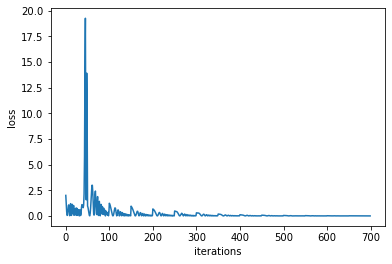

In [22]:
plt.plot(loss_mini)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

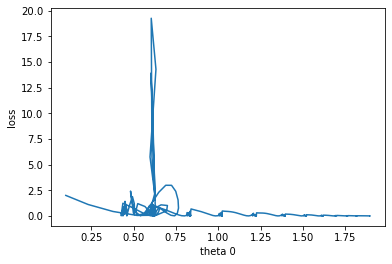

In [23]:
plt.plot(th0_list_mini,loss_mini)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

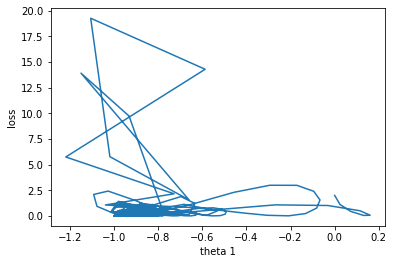

In [24]:
plt.plot(th1_list_mini,loss_mini)
plt.xlabel("theta 1")
plt.ylabel("loss")

Text(0, 0.5, 'y')

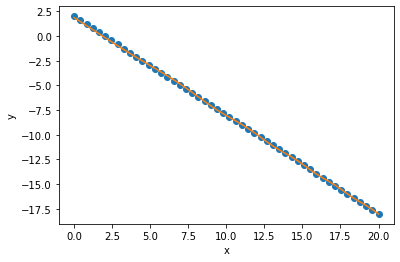

In [25]:
#fitted line
plt.plot(X,Y,"o")
plt.plot(X, Y_pred_mini)
plt.xlabel("x")
plt.ylabel("y")

# 2. Multi variable

In [26]:
f=open("data/MultipleLR.csv")
multi_data=np.loadtxt(f,delimiter=",")
x_0=np.ones((len(multi_data[:,0]) , 1))
multi_X=np.concatenate((x_0, multi_data[:,:3].reshape(len(multi_data[:,0]) , 3)),axis=1)
multi_X.shape

(25, 4)

In [27]:
multi_Y=multi_data[:,3]
multi_Y=multi_Y.reshape((multi_Y.shape[0],1))
multi_Y.shape

(25, 1)

In [28]:
def Adam_MiniBatch_GD_Multi(x,y, batch_size=1,beta1=0.01, beta2=0.01,alpha=0.0001,epsilon=0.001, Epochs_no=100):
    loss=[]
    Y_predict_list=[]
    
    x_batchs=[]
    y_batchs=[]
    
    #get the batches 
    x_batchs,y_batchs=mini_batches(x,y,batch_size)
    
    #1. assume intial values for parameters 
    theta_vector=np.zeros(x.shape[1]).reshape(x.shape[1],1)
    v_vector=np.zeros(x.shape[1]).reshape(x.shape[1],1)
    m_vector=np.zeros(x.shape[1]).reshape(x.shape[1],1)
    
    thetas=theta_vector.T
    
    for e in range(Epochs_no): #epochs loop
        print('==============================================')
        print('epoch ',e)
        
        Y_pred_per_epoch=[]
        for i in range(len(x_batchs)):#loop through all batches
            #2.predict 
            y_predicted=np.dot(x_batchs[i],theta_vector)
            Y_pred_per_epoch.extend(y_predicted)
            #3.cost 
            error= y_predicted - y_batchs[i]
            J= (np.dot(error.T, error))/(2*batch_size)
            loss.append(J[0][0])
            
    
            #4. gradient vector
            gradient_vector=np.zeros(x_batchs[i].shape[1])
            gradient_vector=(np.dot(x_batchs[i].T,(y_predicted - y_batchs[i]) ))/(batch_size)

            #5. update parameters
            
            m_vector = beta1 * m_vector + (1- beta1)*gradient_vector 
            #bias correction
            m_hat_vector= m_vector / ( 1- ((beta1)**(e+1)))
           
            v_vector = beta2 * v_vector +(1-beta2) *  np.square(gradient_vector)
            #bias correction
            v_hat_vector = v_vector / ( 1- ((beta2)**(e+1)))
            
            theta_vector = theta_vector - ((alpha)/(np.sqrt(v_hat_vector) + epsilon )) * m_hat_vector
        
            thetas=np.vstack([thetas, theta_vector.T])
        
             
            
        print('cost= ', J[0][0])
        Y_predict_list.append(Y_pred_per_epoch)
        #stop condition
        
        if(e!=0):
            if abs(prev_cost - J)<0.001:
                break
        prev_cost=J
        
        
    return Y_pred_per_epoch, theta_vector, thetas,loss
            
#batch size = 5    
    

In [44]:
Y_pred_multi, theta_vector_multi, thetas_multi,loss_multi = Adam_MiniBatch_GD_Multi(multi_X,multi_Y,batch_size=5,beta1=0.9,beta2=0.999,alpha=0.1,epsilon=10**(-8), Epochs_no=100)

epoch  0
cost=  717.7597539612865
epoch  1
cost=  2866.6265150224494
epoch  2
cost=  1182.2478198673618
epoch  3
cost=  55.240630822084995
epoch  4
cost=  628.203867404435
epoch  5
cost=  301.4550828029666
epoch  6
cost=  12.596027802589555
epoch  7
cost=  79.38345792322544
epoch  8
cost=  61.206032347501456
epoch  9
cost=  12.056024164354891
epoch  10
cost=  30.040248866940892
epoch  11
cost=  36.83902289732336
epoch  12
cost=  19.040327215152665
epoch  13
cost=  11.58140300076014
epoch  14
cost=  11.9082770497782
epoch  15
cost=  11.495096812603837
epoch  16
cost=  12.99363889574757
epoch  17
cost=  14.816370175444131
epoch  18
cost=  14.20578376817411
epoch  19
cost=  12.754100556671167
epoch  20
cost=  12.072787968422974
epoch  21
cost=  12.088337844252912
epoch  22
cost=  12.489611210333361
epoch  23
cost=  12.869273571066463
epoch  24
cost=  12.877470038119174
epoch  25
cost=  12.630613882917775
epoch  26
cost=  12.428665532717066
epoch  27
cost=  12.393917561580206
epoch  28
cos

In [45]:
r2_score(multi_Y, Y_pred_multi)

0.9795436543303127

Text(0, 0.5, 'loss')

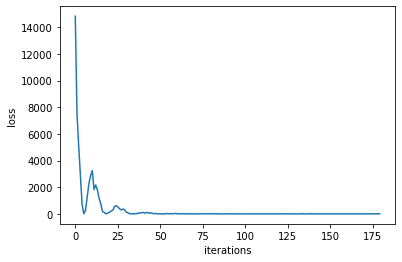

In [46]:
#loss vs. iterations
plt.plot(loss_multi) # alpha is important here ---> make it small as possible
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

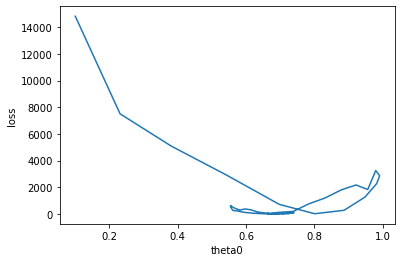

In [47]:
plt.plot(thetas_multi[1:,0],loss_multi)
plt.xlabel("theta0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

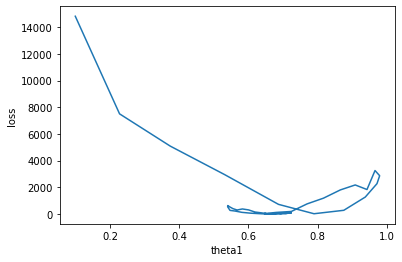

In [48]:
plt.plot(thetas_multi[1:,1],loss_multi)
plt.xlabel("theta1")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

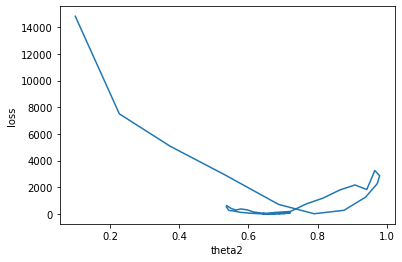

In [49]:
plt.plot(thetas_multi[1:,2],loss_multi)
plt.xlabel("theta2")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

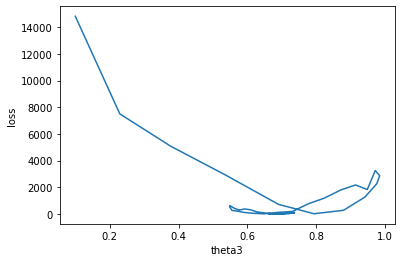

In [50]:
plt.plot(thetas_multi[1:,3],loss_multi)
plt.xlabel("theta3")
plt.ylabel("loss")

In [36]:
Y_pred_multi_1, theta_vector_multi_1, thetas_multi_1,loss_multi_1 = Adam_MiniBatch_GD_Multi(multi_X,multi_Y,batch_size=5,beta1=0.9,beta2=0.9,alpha=0.09,epsilon=10**(-8), Epochs_no=100)

epoch  0
cost=  923.1159017857899
epoch  1
cost=  3563.6779309093654
epoch  2
cost=  1080.027982041295
epoch  3
cost=  493.9708866645804
epoch  4
cost=  990.9605514954965
epoch  5
cost=  12.670319834998551
epoch  6
cost=  382.43552050373603
epoch  7
cost=  11.985573524672784
epoch  8
cost=  221.0288606411656
epoch  9
cost=  17.49065979540361
epoch  10
cost=  38.94905166962376
epoch  11
cost=  81.23631328664233
epoch  12
cost=  15.014015575214753
epoch  13
cost=  12.617575056655507
epoch  14
cost=  18.99751669191235
epoch  15
cost=  10.898975260739295
epoch  16
cost=  17.1241176442781
epoch  17
cost=  13.009221532268821
epoch  18
cost=  10.61665504043203
epoch  19
cost=  21.59400560032572
epoch  20
cost=  12.247953954322162
epoch  21
cost=  11.009746658915326
epoch  22
cost=  17.280532797512343
epoch  23
cost=  17.70323232069743
epoch  24
cost=  11.873128209257796
epoch  25
cost=  12.451776155630744
epoch  26
cost=  16.91422257410658
epoch  27
cost=  16.067598442112274
epoch  28
cost=  

In [37]:
r2_score(multi_Y, Y_pred_multi_1)

0.9789443569873912

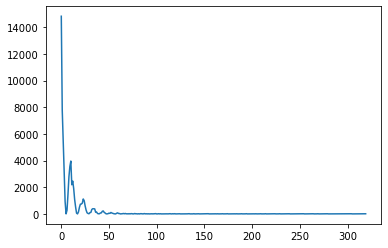

In [38]:
plt.plot(loss_multi_1)

In [42]:
Y_pred_multi_2, theta_vector_multi_2, thetas_multi_2,loss_multi_2 = Adam_MiniBatch_GD_Multi(multi_X,multi_Y,batch_size=5,beta1=0.7,beta2=0.7,alpha=0.1,epsilon=10**(-8), Epochs_no=100)

epoch  0
cost=  837.9620063447388
epoch  1
cost=  804.7108217465648
epoch  2
cost=  234.5349425012033
epoch  3
cost=  31.13019306324959
epoch  4
cost=  12.815011771136245
epoch  5
cost=  13.050158508389675
epoch  6
cost=  16.928997991413972
epoch  7
cost=  20.616310169487782
epoch  8
cost=  16.83287315217118
epoch  9
cost=  10.2207850589182
epoch  10
cost=  10.27034148573895
epoch  11
cost=  9.78154953084503
epoch  12
cost=  9.35670432031391
epoch  13
cost=  9.758771976605212
epoch  14
cost=  8.797426030299363
epoch  15
cost=  10.621075855966396
epoch  16
cost=  8.23056195868214
epoch  17
cost=  18.945387109057975
epoch  18
cost=  9.186714501982006
epoch  19
cost=  9.51766475164881
epoch  20
cost=  12.279721424054404
epoch  21
cost=  7.92033341419044
epoch  22
cost=  31.32363047179074
epoch  23
cost=  31.54966861314508
epoch  24
cost=  31.57700175163165
epoch  25
cost=  32.135726281506415
epoch  26
cost=  33.07491363556217
epoch  27
cost=  34.073634920308564
epoch  28
cost=  33.4220717

In [43]:
r2_score(multi_Y, Y_pred_multi_2)

0.9209626693476817